In [1]:
import pandas as pd
import zipfile
import os

# Extracting the Data
From the zip file, we will extract the data into a temporary directory. We will then read the data into a Pandas DataFrame. The data is simulated sales data for practicing time series analysis.

In [2]:
# Path to the zip file
zip_path = './Simulated_Sales_TimeSeries.zip'
# Temporary directory to extract files
extract_dir = './Simulated_Sales_TimeSeries'

# Ensure the extract directory exists
os.makedirs(extract_dir, exist_ok=True)

In [3]:
sales_ts_test = None
sales_ts_train = None
# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extract_dir)

    # Assuming you know the name of the file you want to read, or there's only one file
    # You could also iterate over all files if needed
    file_names = zip_ref.namelist()
    for file_name in file_names:
        full_file_path = os.path.join(extract_dir, file_name)
        # Construct the full path to the extracted file
        if ((file_name == 'test.csv') == 1) or ((file_name == 'train.csv')):
            if (file_name == 'test.csv') == 1:
                sales_ts_test = pd.read_csv(full_file_path, sep=',')

            if (file_name == 'train.csv') == 1:
                sales_ts_train = pd.read_csv(full_file_path, sep=',')

# Data Preparation

In [4]:
print(sales_ts_test.shape)
print(sales_ts_train.shape)

(25550, 4)
(230090, 4)


From the shape of the data, we notice that they share the same number of columns, but the number of rows is different. This is because the test data is a subset of the train data. We will now combine the two datasets into one.

In [5]:
sales_ts = pd.concat([sales_ts_train, sales_ts_test], axis=0)

In [6]:
sales_ts.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [7]:
sales_ts.shape

(255640, 4)

In [8]:
sales_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255640 entries, 0 to 25549
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         255640 non-null  object
 1   store        255640 non-null  int64 
 2   product      255640 non-null  int64 
 3   number_sold  255640 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.8+ MB


In the abode .info() output, we notice that the Dtypes of the columns are not correct. The Date column needs to be processed as a datetime object, the other three can stay as is. We can also see that there are no missing values in the data, which is great!

In [9]:
sales_ts['Date'] = pd.to_datetime(sales_ts['Date'])

In [10]:
sales_ts.dtypes

Date           datetime64[ns]
store                   int64
product                 int64
number_sold             int64
dtype: object

# Exploratory Data Analysis

We will now explore the data to get a better understanding of it. We will start by looking at the distribution of the column values. 'store' and 'product' seem to be equally represented, and have a plurality in the data - where no single value is more than any other.

In [11]:
# visualizing the values of the store column
sales_ts['store'].value_counts() # 36520 = 0.14(total df), so each store is equally represented

0    36520
1    36520
2    36520
3    36520
4    36520
5    36520
6    36520
Name: store, dtype: int64

In [12]:
sales_ts['product'].value_counts() # 25564 = 0.10(total df), so each product is equally represented

0    25564
1    25564
2    25564
3    25564
4    25564
5    25564
6    25564
7    25564
8    25564
9    25564
Name: product, dtype: int64

We'll make a random subset of the data to visualize as the data has too many rows to visualize effectively

In [13]:
# randomly select 2% of the data
sales_ts_sample = sales_ts.sample(frac=0.02, random_state=42)

Now we will look at the 'date' and combined ['number_sold', 'product'] distributiions

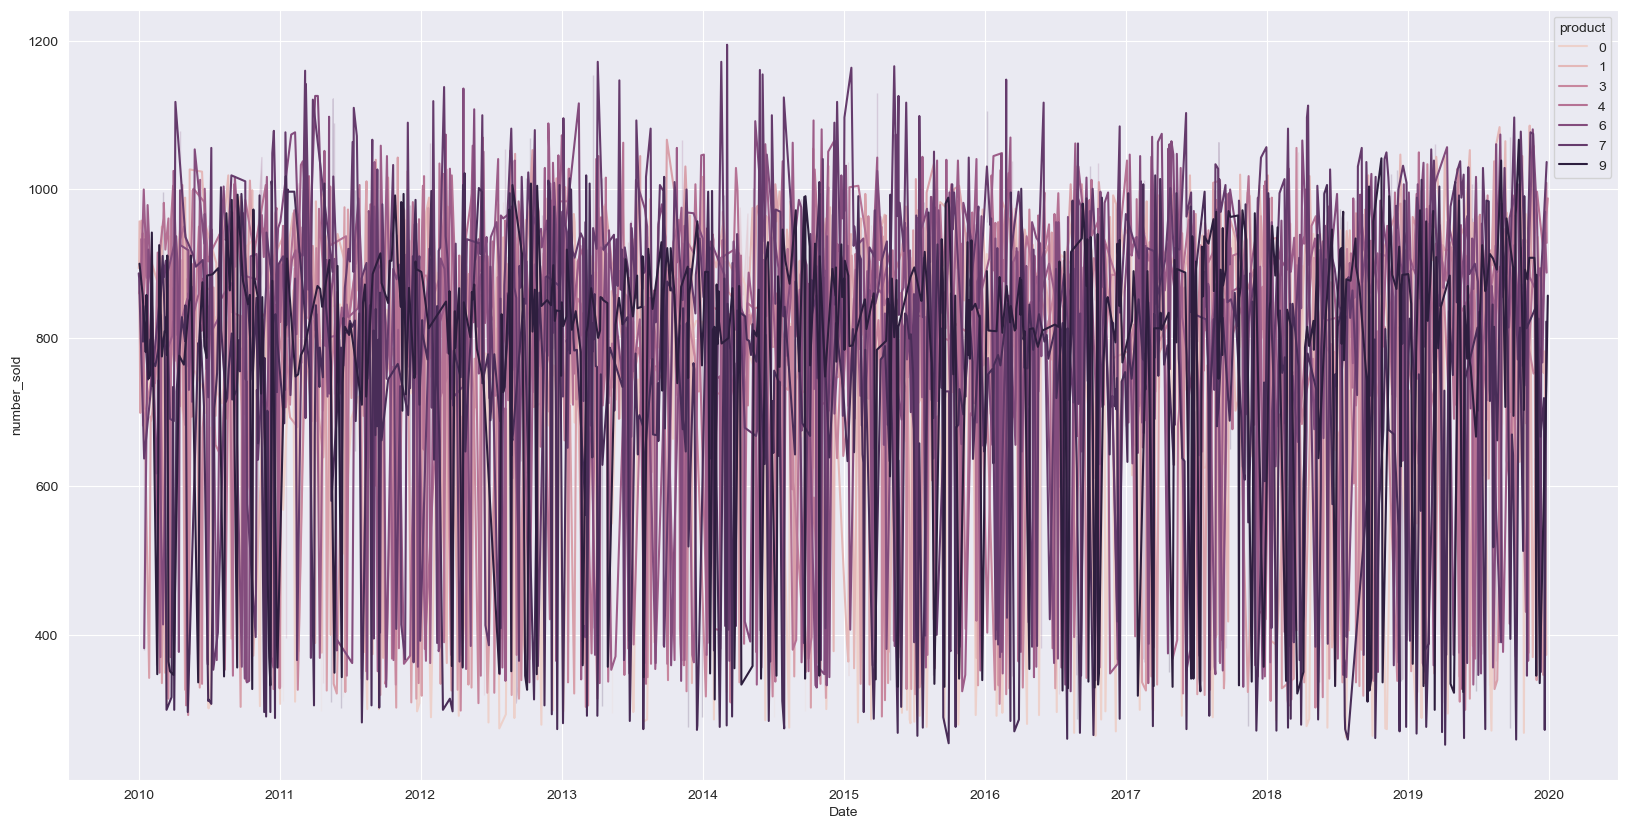

In [14]:
# visualizing the values of the date column by making a visualization where x is the date and y is the number of sales, and the lines are the products
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(x='Date', y='number_sold', hue='product', data=sales_ts_sample)
plt.show()